In [3]:
import numpy as np
#import matplotlib as plt
import math
import matplotlib.pyplot as plt  # 导入绘图库
import random

In [4]:
class PeriodBoundary():
    def __init__(self):
        L=10.
        self.x1=1.
        self.x2=2.
        self.x3=3.
        self.x4=4.
        self.x5=5.
        self.x6=6.
        self.x7=7.
        self.x8=8.
        self.x9=9.
        self.x10=10.
        self.x11=self.x1+L
        print(type(self.x1))
        self.pos=PeriodBoundary.position_array(self)
        self.v=PeriodBoundary.generate_numbers(self)
        self.v1=self.v[0]
        self.v2=self.v[1]
        self.v3=self.v[2]
        self.v4=self.v[3]
        self.v5=self.v[4]
        self.v6=self.v[5]
        self.v7=self.v[6]
        self.v8=self.v[7]
        self.v9=self.v[8]
        self.v10=self.v[9]
        #self.pos=position_array(self)
    def update_pos(self,pos):
        L=10
        self.x1=pos[0]
        self.x2=pos[1]
        self.x3=pos[2]
        self.x4=pos[3]
        self.x5=pos[4]
        self.x6=pos[5]
        self.x7=pos[6]
        self.x8=pos[7]
        self.x9=pos[8]
        self.x10=pos[9]
        self.x11=pos[0]+L
        
    '''
    def generate_numbers(self):
        numbers = []
        while True:
            numbers = [random.uniform(-3, 3) for _ in range(9)]
            square_sum = sum(x**2 for x in numbers)
            if square_sum < 2:
                break

        x10 = -sum(numbers)
        numbers.append(x10)
        square_sum += x10**2

        factor = np.sqrt(2 / square_sum)
        numbers = [x * factor for x in numbers]
        #print(type(numbers[0]))
        return np.array(numbers)
    
    
    '''
    def generate_numbers(self):
    # 生成均值为0的正态分布随机数
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), (10,))
            numbers=numbers-np.mean(numbers)
    
    # 计算平方和
            square_sum = np.sum(np.square(numbers))
            if abs(square_sum-2)<0.001:
                break
  

        return numbers
    
    

    def position_array(self):
        return np.array([self.x1,self.x2,self.x3,\
                        self.x4,self.x5,self.x6, \
                        self.x7,self.x8,self.x9,
                        self.x10,self.x11])

    def calculate_force(self):
        real_pos=PeriodBoundary.position_array(self)
        relative_pos=real_pos[1:] - real_pos[:-1]
        #f_left=-1*(relative_pos-1)-(relative_pos-1)**3-0.01*(1/(relative_pos)**7)
        f_left=1*((relative_pos)-1)+1*((relative_pos)-1)**3
        #print(f_left.shape)
        f_right=np.roll(-1*f_left,1)
        #f=-1*(r2-r1-1)-(r2-r1-1)**3
        return f_left+f_right
    

    def calculate_hamilton(self):
        real_pos=PeriodBoundary.position_array(self)
        relative_pos=real_pos[1:] - real_pos[:-1]
        t=0.5*self.v**2
        u=0.5*(relative_pos-1)**2+0.25*(relative_pos-1)**4
        return sum(t+u)
    
    def ts_method(self,h,t):
        total_pos=np.empty((10,t))
        total_v=np.empty((10,t))
        total_e=[]
        total_p=[]
        total_t=[]
        #t0时刻的数值
        v0=self.v
        x0=self.pos[:-1] #扣除最后一个
        f0=PeriodBoundary.calculate_force(self)
        v_now=v0
        x_now=x0
        f_now=f0
        #-h时刻的速度
        v_history=v0-h*f0
        #t0时刻的位置和速度
        v_new=v_history+2*h*f_now
        self.v=v_new  #更新now的速度
        x_new=x_now+v_now*h
        total_pos[:,0]=x_new
        PeriodBoundary.update_pos(self,x_new)  #更新now的位置
        self.pos=PeriodBoundary.position_array(self) #更新now的位置
        energy=PeriodBoundary.calculate_hamilton(self)
        total_e.append(energy)
        total_t.append(sum(0.5*self.v**2))
        #print(sum(v0))
        total_p.append(sum(self.v))
        v_history=v_now
        x_history=x_now
        v_now=v_new
        x_now=x_new
        #print(f0)
        for i in range(1,t):
            f_now=PeriodBoundary.calculate_force(self)
            v_new=v_history+2*h*f_now
            self.v=v_new  #更新now的速度
            energy=PeriodBoundary.calculate_hamilton(self)
            total_e.append(energy)
            total_p.append(sum(self.v))
            total_t.append(sum(0.5*self.v**2))
            #x_new=x_history+2*h*v_history
            x_new=x_history+2*h*v_now
            total_pos[:,i]=x_new
            PeriodBoundary.update_pos(self,x_new)  #更新now的位置
            self.pos=PeriodBoundary.position_array(self) #更新now的位置
            x_history=x_now
            v_history=v_now
            x_now=x_new
            v_now=v_new
        return total_e,total_p,total_t,total_pos
            
            


In [15]:
B=PeriodBoundary()
Ea,Pa ,Et,po=B.ts_method(0.01,10000)

<class 'float'>


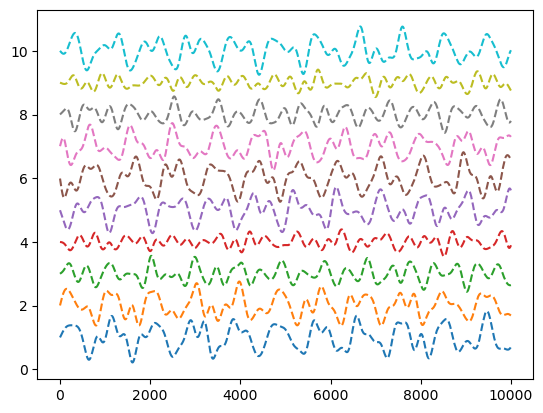

In [16]:
for i in range(10):
    plt.plot(po[i,:],'--')

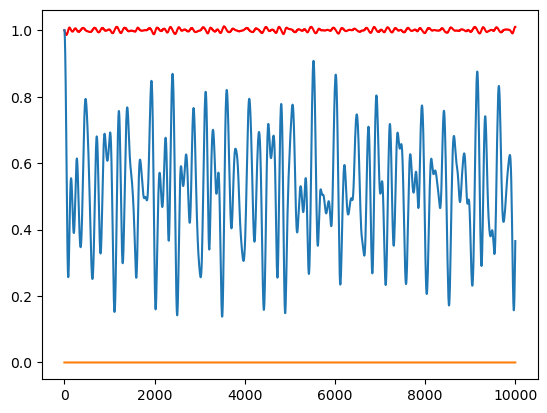

In [17]:
plt.plot(Ea[:],'r')
plt.plot(Et[:])
plt.plot(Pa[:])

In [ ]:
import numpy as np
import random

def generate_numbers():
    numbers = []
    while True:
        numbers = [random.uniform(-2, 2) for _ in range(9)]
        square_sum = sum(x**2 for x in numbers)
        if square_sum < 2:
            break

    x10 = -sum(numbers)
    numbers.append(x10)
    square_sum += x10**2

    factor = np.sqrt(2 / square_sum)
    numbers = [x * factor for x in numbers]

    return numbers

numbers = generate_numbers()
print("10个随机数:", numbers)
print("和:", sum(numbers))
print("平方和:", sum(0.5*x**2 for x in numbers))


In [ ]:
def generate_numbers():
    # 生成均值为0的正态分布随机数
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), (10,))
            numbers=numbers-np.mean(numbers)
    
    # 计算平方和
            square_sum = np.sum(np.square(numbers))
            if abs(square_sum-2)<0.001:
                break
  

        return numbers

numbers = generate_numbers()
print("10个随机数:", numbers)
print("和:", np.sum(numbers))
print("平方和:", np.sum(np.square(numbers)))

In [ ]:
import numpy as np

def generate_numbers():
    # 生成均值为0的正态分布随机数
    numbers = np.random.normal(0, np.sqrt(0.2), (10,))
    #print(numbers)
    #print(np.mean(numbers))
    numbers=numbers-np.mean(numbers)
    
    # 计算平方和
    square_sum = np.sum(np.square(numbers))

    # 调整数值使平方和为2
    #factor = np.sqrt(target_square_sum / square_sum)
    #numbers = numbers * factor

    return numbers

numbers = generate_numbers()
print("10个随机数:", numbers)
print("和:", np.sum(numbers))
print("平方和:", np.sum(np.square(numbers)))


In [103]:
import numpy as np

class PeriodBoundary():
    """
    A class representing a periodic boundary condition system.

    Attributes:
    - L: A float representing the length of the system.
    - x: A NumPy array representing the position of particles.
    - pos: A NumPy array representing the position of particles without periodic boundary conditions.
    - v: A NumPy array representing the velocity of particles.

    Methods:
    - update_pos(pos): Update the position of particles with new positions.
    - generate_numbers(): Generate random numbers with a mean of 0 and variance of 0.2.
    - position_array(): Return the position of particles without periodic boundary conditions.
    - calculate_force(): Calculate the force between adjacent particles.
    - calculate_hamilton(): Calculate the Hamiltonian of the system.
    - ts_method(h, t): Use the Trapezoid-Staggered Method to solve the differential equations and return the time evolution of energy, momentum, kinetic energy, and position.
    """
    
    def __init__(self):
        # 设置常量和初始位置、速度
        self.L = 10.
        self.x = np.arange(1, 12)
        self.pos = self.position_array()
        self.v = self.generate_numbers()
        
    def update_pos(self, pos):
        # 更新位置
        self.x[:10] = pos
        self.x[10] = pos[0] + self.L
        self.pos = self.position_array()

    def generate_numbers(self):
        # 生成均值为0，方差为0.2的正态分布随机数
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), (10,))
            # 减去均值
            numbers -= np.mean(numbers)
            # 如果平方和与2之差小于0.001，退出循环
            square_sum = np.sum(np.square(numbers))
            if abs(square_sum - 2) < 0.001:
                break
        # 根据平方和缩放随机数
        factor = np.sqrt(2 / square_sum)
        return numbers * factor

    def position_array(self):
        # 返回位置数组
        return self.x[:10]

    def calculate_force(self):
        # 计算相邻质点间的力
        relative_pos = np.diff(self.position_array())
        f_left = ((relative_pos) - 1) + ((relative_pos) - 1) ** 3
        f_right = np.roll(-f_left, 1)
        return f_left + f_right
    
    def calculate_hamilton(self):
        # 计算哈密顿量
        relative_pos = np.diff(self.position_array())
        t = 0.5 * self.v ** 2
        u = 0.5 * (relative_pos - 1) ** 2 + 0.25 * (relative_pos - 1) ** 4
        return np.sum(t + u)

    def ts_method(self, h, t):
        # 使用 Trapezoid-Staggered Method 求解微分方程
        total_pos = np.empty((10, t))
        total_v = np.empty((10, t))
        total_e = []
        total_p = []
        total_t = []
        # t0 时刻的数值
        v0 = self.v
        x0 = self.position_array()
        f0 = self.calculate_force()
        v_now = v0
        x_now = x0
        f_now = f0
        # -h 时刻的速度
        v_history = v_now - h * f_now
        # t0 时刻的位置和速度
        v_new = v_history + 2 * h * f_now
        self.v = v_new
        x_new = x_now + v_now * h
        self.update_pos(x_new)
        energy = self.calculate_hamilton()
        total_e.append(energy)
        total_t.append(np.sum(0.5 * self.v ** 2))
        total_p.append(np.sum(self.v))
        v_history = v_now
        x_history = x_now
        v_now = v_new
        x_now = x_new
        for i in range(1, t):
            f_now = self.calculate_force()
            v_new = v_history + 2 * h * f_now
            self.v = v_new
            energy = self.calculate_hamilton()
            total_e.append(energy)
            total_p.append(np.sum(self.v))
            total_t.append(np.sum(0.5 * self.v ** 2))
            x_new = x_history + 2 * h * v_history
            total_pos[:, i] = x_new
            self.update_pos(x_new)
            x_history = x_now
            v_history = v_now
            x_now = x_new
            v_now = v_new
        # 返回平均动量和平均动能
        return total_e, total_p / t, total_t / t, total_pos

   


In [129]:
class PeriodBoundary:
    def __init__(self):
        L = 10.
        self.x = np.arange(1, 11)
        self.pos = np.append(self.x, self.x[0] + L)
        self.v = self.generate_numbers()
        
    def update_pos(self, pos):
        self.pos = np.append(pos, pos[0] + 10)
        
    def generate_numbers(self):
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), size=10)
            numbers = numbers - np.mean(numbers)
            square_sum = np.sum(numbers ** 2)
            if abs(square_sum - 2) < 0.001:
                break
        #factor = np.sqrt(2 / square_sum)
        #return numbers * factor
        return numbers
    
    def calculate_force(self):
        relative_pos = np.diff(self.pos)
        f_left = 1 * (relative_pos - 1) + 1 * (relative_pos - 1) ** 3
        f_right = np.roll(-1 * f_left, 1)
        return f_left + f_right
    
    def calculate_hamilton(self):
        relative_pos = np.diff(self.pos)
        t = 0.5 * self.v ** 2
        u = 0.5 * (relative_pos - 1) ** 2 + 0.25 * (relative_pos - 1) ** 4
        return np.sum(t + u)
    
    def ts_method(self, h, t):
        total_pos = np.empty((10, t))
        total_v = np.empty((10, t))
        total_e = []
        total_p = []
        total_t = []
        v0 = self.v
        x0 = self.pos[:-1]
        f0 = self.calculate_force()
        v_now = v0
        x_now = x0
        f_now = f0
        v_history = v_now - h * f_now
        v_new = v_history + 2 * h * f_now
        self.v = v_new
        x_new = x_now + v_now * h
        total_pos[:, 0] = x_new
        self.update_pos(x_new)
        energy = self.calculate_hamilton()
        total_e.append(energy)
        total_t.append(np.sum(0.5 * self.v ** 2))
        total_p.append(np.sum(self.v))
        v_history = v_now
        x_history = x_now
        v_now = v_new
        x_now = x_new
        for i in range(1, t):
            f_now = self.calculate_force()
            v_new = v_history + 2 * h * f_now
            self.v = v_new
            energy = self.calculate_hamilton()
            total_e.append(energy)
            total_p.append(np.sum(self.v))
            total_t.append(np.sum(0.5 * self.v ** 2))
            x_new = x_history + 2 * h * v_history
            total_pos[:, i] = x_new
            self.update_pos(x_new)
            x_history = x_now
            v_history = v_now
            x_now = x_new
            v_now = v_new
        return total_e, np.array(total_p) / t, np.array(total_t),total_pos


In [130]:
C=PeriodBoundary()
Ea,Pa ,Et,poa=C.ts_method(0.001,4000)

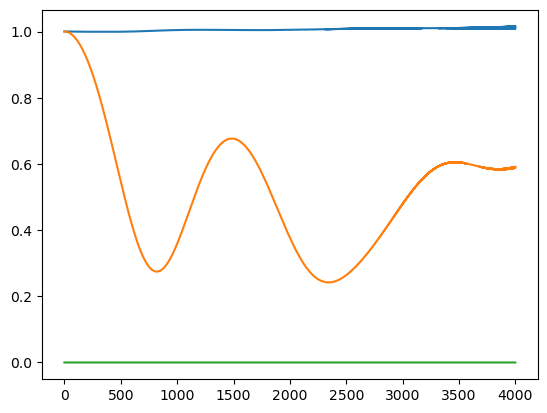

In [131]:
plt.plot(Ea)
plt.plot(Et)
plt.plot(Pa)

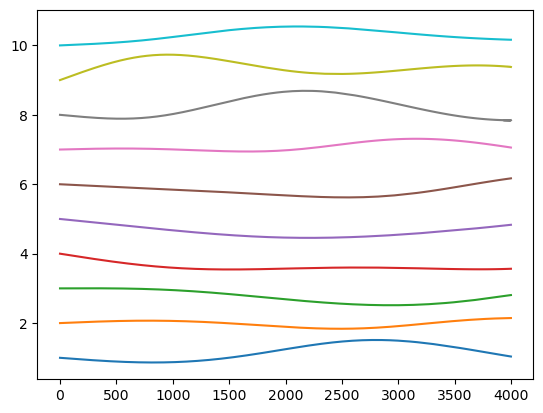

In [133]:
for i in range(10):
    plt.plot(poa[i,:])

In [134]:
import numpy as np

class PeriodBoundary:
    """
    A class for simulating the dynamics of particles in a 1D chain with periodic boundary conditions.
    """
    def __init__(self):
        """
        Initializes the class with default values.
        
        L: float
            The length of the chain
        x: ndarray
            Array of positions of the particles
        pos: ndarray
            Array of positions of the particles with periodic boundary conditions
        v: ndarray
            Array of velocities of the particles
        """
        L = 10.
        self.x = np.arange(1, 11)
        self.pos = np.append(self.x, self.x[0] + L)
        self.v = self.generate_numbers()
        
    def update_pos(self, pos):
        """
        Updates the positions of the particles with periodic boundary conditions.
        
        Parameters:
        pos: ndarray
            Array of positions of the particles
        """
        self.pos = np.append(pos, pos[0] + 10)
        
    def generate_numbers(self):
        """
        Generates random velocities for the particles.
        
        Returns:
        numbers: ndarray
            Array of random velocities for the particles
        """
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), size=10)
            numbers = numbers - np.mean(numbers)
            square_sum = np.sum(numbers ** 2)
            if abs(square_sum - 2) < 0.001:
                break
        return numbers
    
    def calculate_force(self):
        """
        Calculates the force acting on each particle using the Lennard-Jones potential.
        
        Returns:
        force: ndarray
            Array of forces acting on each particle
        """
        relative_pos = np.diff(self.pos)
        f_left = 1 * (relative_pos - 1) + 1 * (relative_pos - 1) ** 3
        f_right = np.roll(-1 * f_left, 1)
        return f_left + f_right
    
    def calculate_hamilton(self):
        """
        Calculates the Hamiltonian of the system.
        
        Returns:
        hamiltonian: float
            The Hamiltonian of the system
        """
        relative_pos = np.diff(self.pos)
        t = 0.5 * self.v ** 2
        u = 0.5 * (relative_pos - 1) ** 2 + 0.25 * (relative_pos - 1) ** 4
        return np.sum(t + u)
    
    def ts_method(self, h, t):
        """
        使用Trapezoidal rule进行时间演化，求解带有周期性边界的链状分子的Hamilton量、平均动量、温度和每个原子的位置。
        
        参数：
            h: float，时间步长
            t: int，演化时间步数
            
        返回值：
            tuple，包含以下四个元素：
                total_e: list，每个时间步的Hamilton量
                total_p: ndarray，每个时间步的平均动量
                total_t: ndarray，每个时间步的温度
                total_pos: ndarray，每个原子在每个时间步的位置
        """
        # 初始化数组
        total_pos = np.empty((10, t))
        total_v = np.empty((10, t))
        total_e = []
        total_p = []
        total_t = []
        
        # 初始化速度、位置和力
        v0 = self.v
        x0 = self.pos[:-1]
        f0 = self.calculate_force()
        v_now = v0
        x_now = x0
        f_now = f0
        
        # 使用前一步的速度更新位置
        v_history = v_now - h * f_now
        # 使用Trapezoidal rule更新速度
        v_new = v_history + 2 * h * f_now
        self.v = v_new
        # 使用前一步的速度更新位置
        x_new = x_now + v_now * h
        
        # 记录初始状态
        total_pos[:, 0] = x_new
        self.update_pos(x_new)
        energy = self.calculate_hamilton()
        total_e.append(energy)
        total_t.append(np.sum(0.5 * self.v ** 2))
        total_p.append(np.sum(self.v))
        
        # 更新速度和位置，计算Hamilton量、平均动量和温度
        v_history = v_now
        x_history = x_now
        v_now = v_new
        x_now = x_new
        for i in range(1, t):
            f_now = self.calculate_force()
            # 使用Trapezoidal rule更新速度
            v_new = v_history + 2 * h * f_now
            self.v = v_new
            energy = self.calculate_hamilton()
            total_e.append(energy)
            total_p.append(np.sum(self.v))
            total_t.append(np.sum(0.5 * self.v ** 2))
            # 使用Trapezoidal rule更新位置
            x_new = x_history + 2 * h * v_history
            total_pos[:, i] = x_new
            self.update_pos(x_new)
            x_history = x_now
            v_history = v_now
            x_now = x_new
            v_now = v_new
        
        return total_e, np.array(total_p) / t, np.array(total_t), total_pos



In [135]:
C=PeriodBoundary()
Ea,Pa ,Et,poa=C.ts_method(0.001,4000)

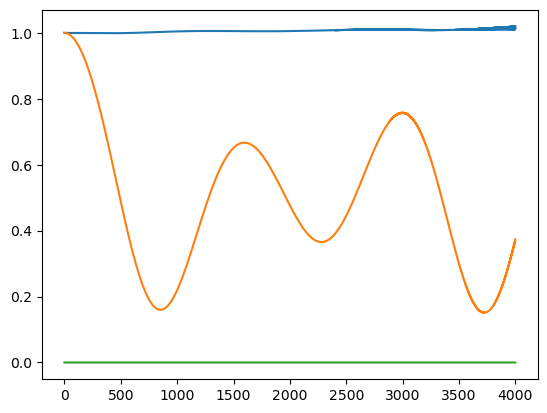

In [136]:
plt.plot(Ea)
plt.plot(Et)
plt.plot(Pa)

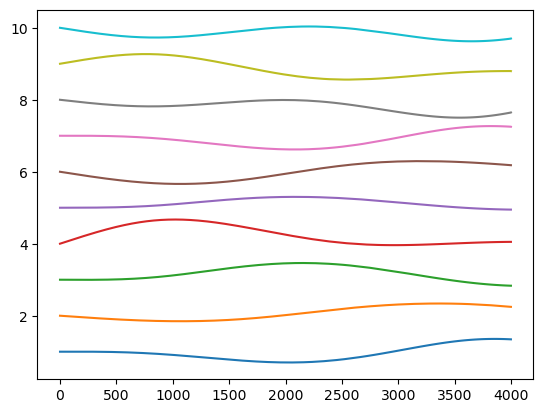

In [137]:
for i in range(10):
    plt.plot(poa[i,:])

In [138]:
import numpy as np

class PeriodBoundary:
    """
    A class for simulating the dynamics of particles in a 1D chain with periodic boundary conditions.
    """
    def __init__(self):
        """
        Initializes the class with default values.
        
        L: float
            The length of the chain
        x: ndarray
            Array of positions of the particles
        pos: ndarray
            Array of positions of the particles with periodic boundary conditions
        v: ndarray
            Array of velocities of the particles
        """
        L = 10.
        self.x = np.arange(1, 11)
        self.pos = np.append(self.x, self.x[0] + L)
        self.v = self.generate_numbers()
        
    def update_pos(self, pos):
        """
        Updates the positions of the particles with periodic boundary conditions.
        
        Parameters:
        pos: ndarray
            Array of positions of the particles
        """
        self.pos = np.append(pos, pos[0] + 10)
        
    def generate_numbers(self):
        """
        Generates random velocities for the particles.
        
        Returns:
        numbers: ndarray
            Array of random velocities for the particles
        """
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), size=10)
            numbers = numbers - np.mean(numbers)
            square_sum = np.sum(numbers ** 2)
            if abs(square_sum - 2) < 0.001:
                break
        return numbers
    
    def calculate_force(self):
        """
        Calculates the force acting on each particle using the Lennard-Jones potential.
        
        Returns:
        force: ndarray
            Array of forces acting on each particle
        """
        relative_pos = np.diff(self.pos)
        f_left = 1 * (relative_pos - 1) + 1 * (relative_pos - 1) ** 3
        f_right = np.roll(-1 * f_left, 1)
        return f_left + f_right
    
    def calculate_hamilton(self):
        """
        Calculates the Hamiltonian of the system.
        
        Returns:
        hamiltonian: float
            The Hamiltonian of the system
        """
        relative_pos = np.diff(self.pos)
        t = 0.5 * self.v ** 2
        u = 0.5 * (relative_pos - 1) ** 2 + 0.25 * (relative_pos - 1) ** 4
        return np.sum(t + u)
    
    def ts_method(self, h, t):
        """
        Perform the Verlet algorithm with time-step `h` for `t` iterations.
        
        Parameters:
        -----------
        h: float
            Time-step for Verlet algorithm
        t: int
            Number of iterations to perform
            
        Returns:
        --------
        total_e: list of floats
            List of total energy at each time step
        total_p: numpy.ndarray of shape (10,)
            Array of total momentum in the system at each time step
        total_t: numpy.ndarray of shape (t,)
            Array of total kinetic energy in the system at each time step
        total_pos: numpy.ndarray of shape (10, t)
            Array of position of particles at each time step
        """
        
        # Create arrays to store data
        total_pos = np.empty((10, t))
        total_e = []
        total_p = []
        total_t = []
        
        # Initial conditions
        v0 = self.v
        x0 = self.pos[:-1]
        f0 = self.calculate_force()
        v_now = v0
        x_now = x0
        f_now = f0
        
        # Compute velocities and positions for the next time step
        v_history = v_now - h * f_now
        v_new = v_history + 2 * h * f_now
        self.v = v_new
        x_new = x_now + v_now * h
        total_pos[:, 0] = x_new
        self.update_pos(x_new)
        
        # Compute energy, momentum, and kinetic energy
        energy = self.calculate_hamilton()
        total_e.append(energy)
        total_t.append(np.sum(0.5 * self.v ** 2))
        total_p.append(np.sum(self.v))
        
        # Store current values
        v_history = v_now
        x_history = x_now
        v_now = v_new
        x_now = x_new
        
        # Loop over remaining time steps
        for i in range(1, t):
            f_now = self.calculate_force()
            v_new = v_history + 2 * h * f_now
            self.v = v_new
            energy = self.calculate_hamilton()
            total_e.append(energy)
            total_p.append(np.sum(self.v))
            total_t.append(np.sum(0.5 * self.v ** 2))
            x_new = x_history + 2 * h * v_history
            total_pos[:, i] = x_new
            self.update_pos(x_new)
            x_history = x_now
            v_history = v_now
            x_now = x_new
            v_now = v_new
            
        return total_e, np.array(total_p) / t, np.array(total_t), total_pos



In [139]:
C=PeriodBoundary()
Ea,Pa ,Et,poa=C.ts_method(0.001,4000)

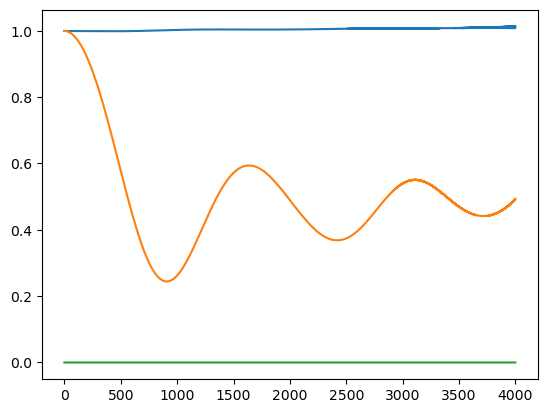

In [141]:
plt.plot(Ea)
plt.plot(Et)
plt.plot(Pa)

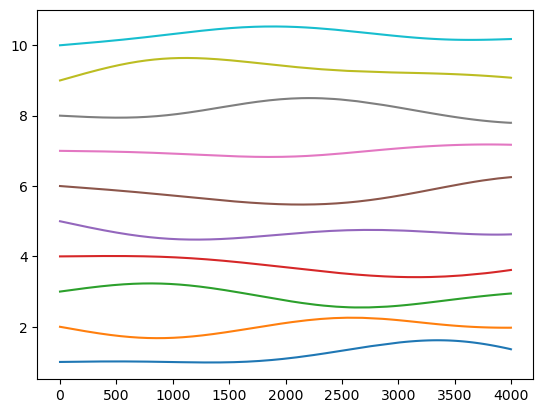

In [140]:
for i in range(10):
    plt.plot(poa[i,:])

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import random


class PeriodBoundary:
    """
    A class representing a periodic boundary condition system.

    Attributes:
    - L: A float representing the length of the system.
    - x: A NumPy array representing the position of particles.
    - pos: A NumPy array representing the position of particles without periodic boundary conditions.
    - v: A NumPy array representing the velocity of particles.

    Methods:
    - update_pos(pos): Update the position of particles with new positions.
    - generate_numbers(): Generate random numbers with a mean of 0 and variance of 0.2.
    - position_array(): Return the position of particles without periodic boundary conditions.
    - calculate_force(): Calculate the force between adjacent particles.
    - calculate_hamilton(): Calculate the Hamiltonian of the system.
    - ts_method(h, t): Use the Trapezoid-Staggered Method to solve the differential equations and return the time evolution of energy, momentum, kinetic energy, and position.
    """
    def __init__(self) -> None:
        """
        Initialize the class with a chain of 10 atoms with periodic boundary conditions.
        """
        L = 10.
        self.x = np.arange(1, 11)
        self.pos = np.append(self.x, self.x[0] + L)
        self.v = self.generate_numbers()

    def update_pos(self, pos: np.ndarray) -> None:
        """
        Update the position array with the given position.

        Parameters:
            pos: ndarray, the new position array.

        Returns:
            None
        """
        self.pos = np.append(pos, pos[0] + 10)

    def generate_numbers(self) -> np.ndarray:
        """
        Generate a list of random numbers that satisfy certain criteria.

        Returns:
            ndarray, a list of 10 random numbers.
        """
        while True:
            numbers = np.random.normal(0, np.sqrt(0.2), size=10)
            numbers = numbers - np.mean(numbers)
            square_sum = np.sum(numbers ** 2)
            if abs(square_sum - 2) < 0.001:
                break
        return numbers

    def calculate_force(self) -> np.ndarray:
        """
        Calculate the force acting on each atom.

        Returns:
            ndarray, the force acting on each atom.
        """
        relative_pos = np.diff(self.pos)
        f_left = 1 * (relative_pos - 1) + 1 * (relative_pos - 1) ** 3
        f_right = np.roll(-1 * f_left, 1)
        return f_left + f_right

    def calculate_hamilton(self) -> float:
        """
        Calculate the Hamiltonian of the system.

        Returns:
            float, the Hamiltonian of the system.
        """
        relative_pos = np.diff(self.pos)
        t = 0.5 * self.v ** 2
        u = 0.5 * (relative_pos - 1) ** 2 + 0.25 * (relative_pos - 1) ** 4
        return np.sum(t + u)

    def ts_method(self, h: float, t: int) -> tuple[list[float], np.ndarray, np.ndarray, np.ndarray]:
        """
        Use the trapezoidal rule for time evolution to calculate the Hamiltonian, average momentum, temperature,
        and positions of atoms for a chain molecule with periodic boundary conditions.

        Parameters:
            h: float, time step.
            t: int, number of time steps.

        Returns:
            tuple, containing four elements:
                total_e: list[float], Hamiltonian at each time step.
                total_p: ndarray, average momentum at each time step.
                total_t: ndarray, temperature at each time step.
                total_pos: ndarray, positions of atoms at each time step.
        """
        # Create arrays to store data
        total_pos = np.empty((10, t))
        total_e = []
        total_p = []
        total_t = []
        
        # Initial conditions
        v0 = self.v
        x0 = self.pos[:-1]
        f0 = self.calculate_force()
        v_now = v0
        x_now = x0
        f_now = f0
        
        # Compute velocities and positions for the next time step
        v_history = v_now - h * f_now
        v_new = v_history + 2 * h * f_now
        self.v = v_new
        x_new = x_now + v_now * h
        total_pos[:, 0] = x_new
        self.update_pos(x_new)
        
        # Compute energy, momentum, and kinetic energy
        energy = self.calculate_hamilton()
        total_e.append(energy)
        total_t.append(np.sum(0.5 * self.v ** 2))
        total_p.append(np.sum(self.v))
        
        # Store current values
        v_history = v_now
        x_history = x_now
        v_now = v_new
        x_now = x_new
        
        # Loop over remaining time steps
        for i in range(1, t):
            f_now = self.calculate_force()
            v_new = v_history + 2 * h * f_now
            self.v = v_new
            energy = self.calculate_hamilton()
            total_e.append(energy)
            total_p.append(np.sum(self.v))
            total_t.append(np.sum(0.5 * self.v ** 2))
            x_new = x_history + 2 * h * v_now
            total_pos[:, i] = x_new
            self.update_pos(x_new)
            x_history = x_now
            v_history = v_now
            x_now = x_new
            v_now = v_new
            
        return total_e, np.array(total_p) / t, np.array(total_t), total_pos
       


In [213]:
C=PeriodBoundary()
Ea,Pa ,Et,poa=C.ts_method(0.001,100000)

In [89]:
len(Ea)

1000

In [214]:
len(Ea)
x=np.linspace(0,100,100000)

Text(0.5, 1.0, '$h=0.1, t=1000$')

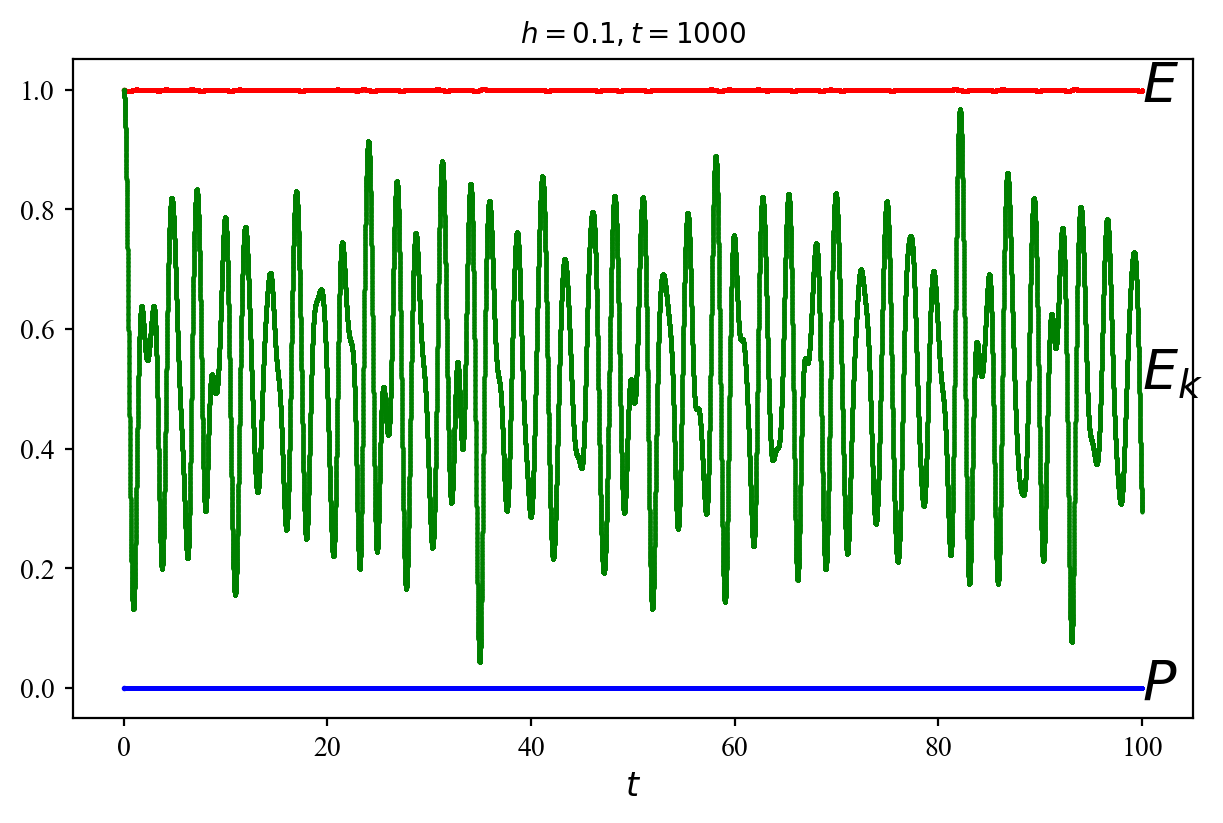

In [170]:
#draw
fig, ax = plt.subplots(figsize=(6, 4),dpi=200, layout='constrained')
ax.plot(Ea[0],'r.',label="$E$",markersize=2)
ax.plot(x, Ea,'r.',markersize=0.9)
ax.plot(Pa[0],'b.',label="$P$",markersize=2)
ax.plot(x, Pa,'b.',markersize=0.9)

ax.plot(Et[0],'g.',label="$E_k$",markersize=2)
ax.plot(x, Et,'g.',markersize=0.9)
#ax.set_xlim(-0.1,1.1)
#ax.set_ylim(-0.1,0.7)

#ticks
ax.set_xlabel('$t$', fontsize=12, fontproperties='Times New Roman')
#ax.set_ylabel('P(x)', fontsize=12, fontproperties='Times New Roman')
ax.tick_params(size=3, labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#legend
#ax.legend(loc=(0.85,0.65), fontsize=10, frameon=False, prop='Times New Roman')

ax.text(100.03,0.98, '$E$',
        style ='italic',
        fontsize = 20)

ax.text(100.03,-0.02, '$P$',
        style ='italic',
        fontsize = 20)

ax.text(100.03,0.5, '$E_k$',
        style ='italic',
        fontsize = 20)

#title
ax.set_title('$h=0.1, t=1000$',
             fontsize=10,
             fontproperties='Times New Roman')

#fig.savefig('h0001.jpg')


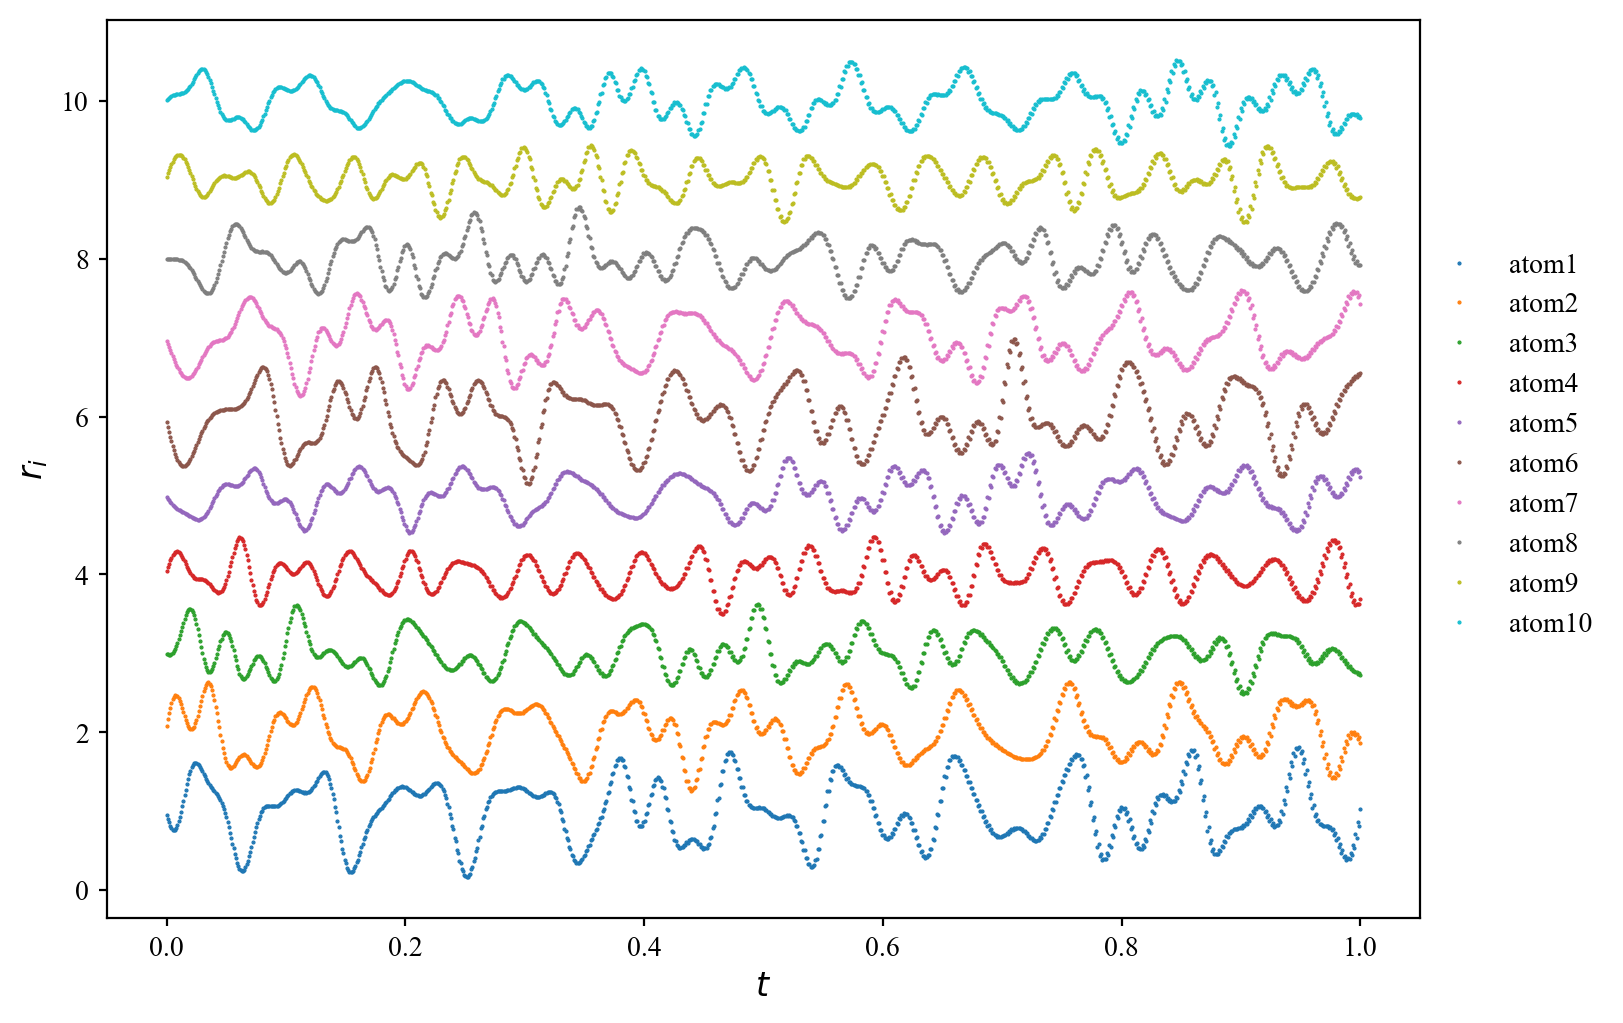

In [94]:
#draw
fig, ax = plt.subplots(figsize=(8, 5),dpi=200, layout='constrained')
for i in range(10):
    ax.plot(x,poa[i],'.',label="atom"+str(i+1),markersize=1)

#ax.set_xlim(-0.1,5)
#ax.set_ylim(-0.1,0.7)

#ticks
ax.set_xlabel('$t$', fontsize=12, fontproperties='Times New Roman')
ax.set_ylabel('$r_i$', fontsize=12, fontproperties='Times New Roman')
ax.tick_params(size=3, labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#legend
ax.legend(loc=(1,0.3), fontsize=20, frameon=False, prop='Times New Roman')
#fig.savefig('24.jpg')

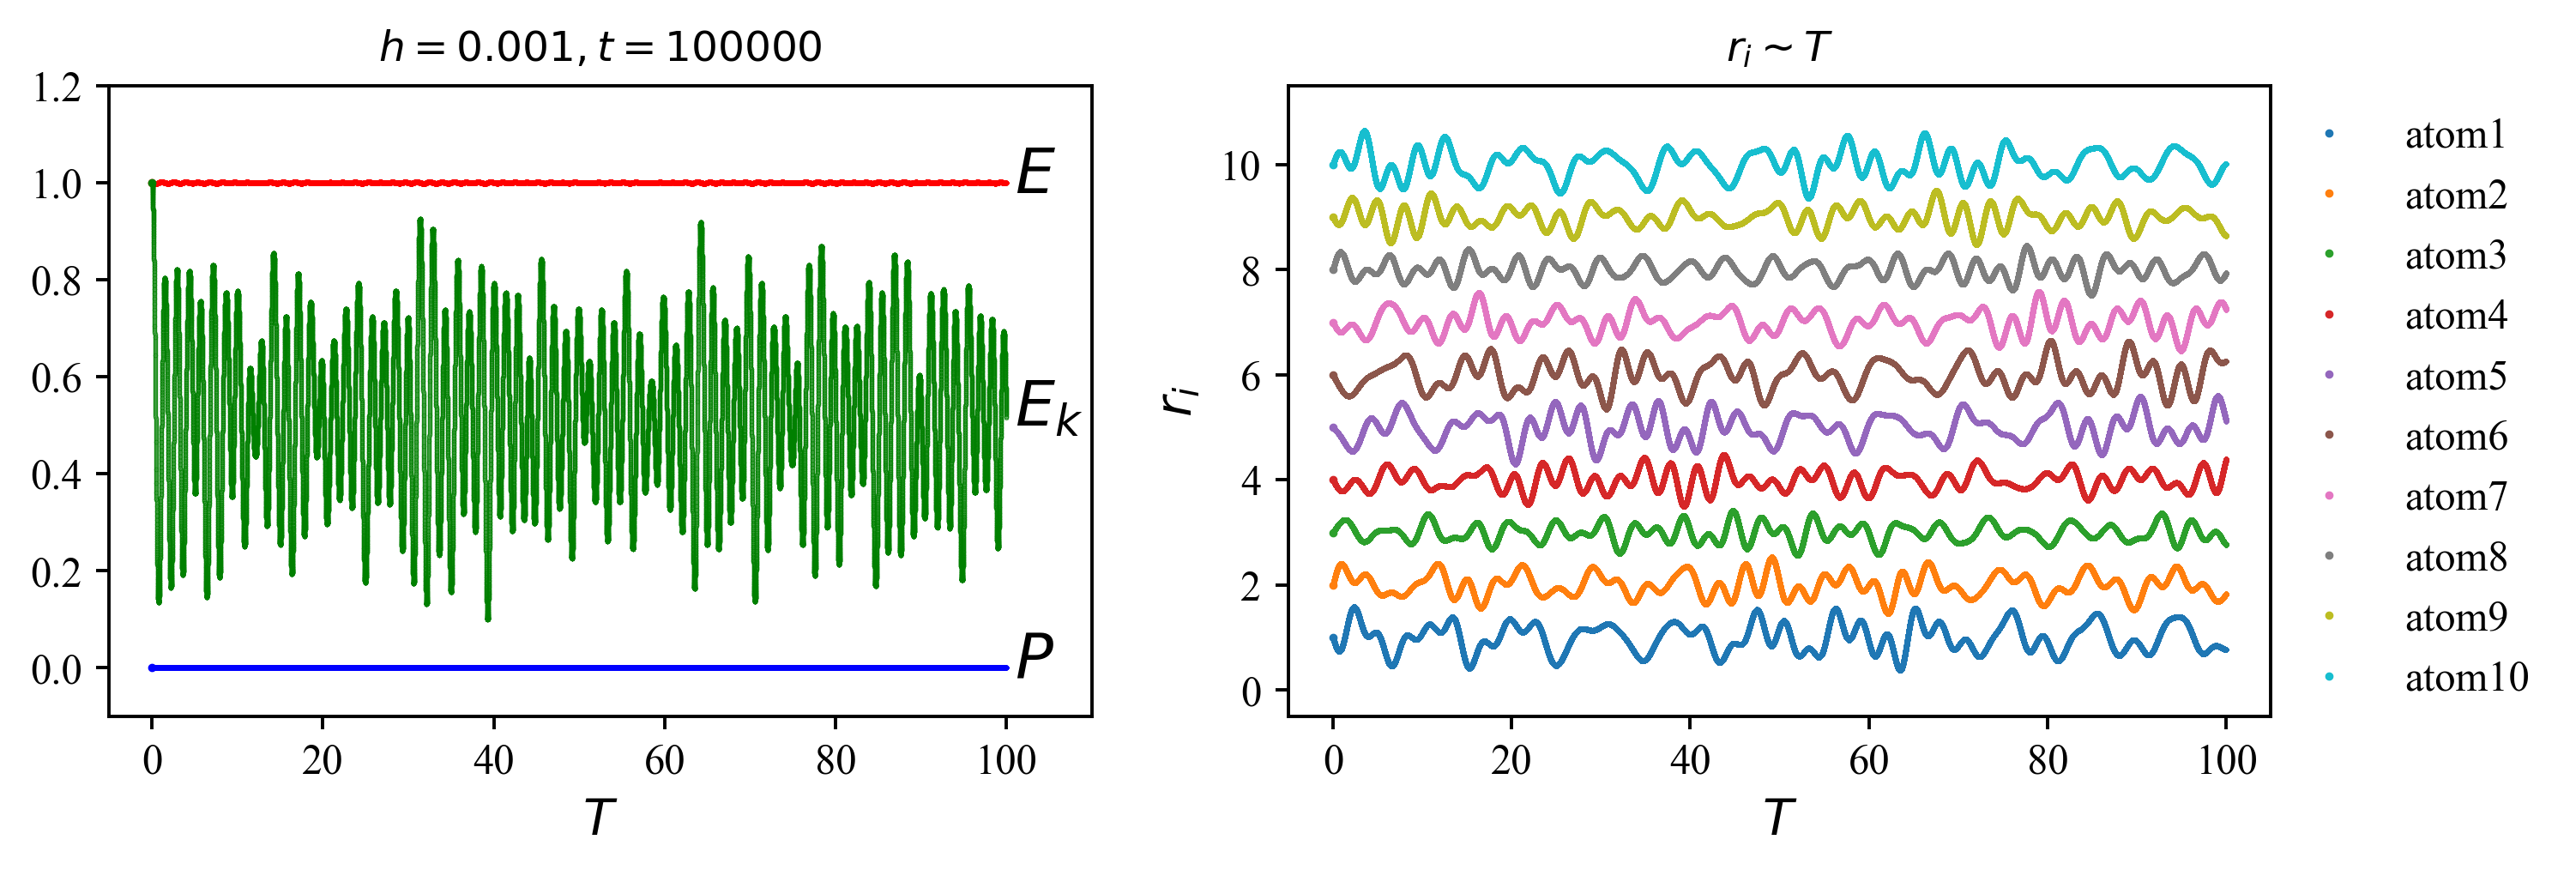

In [216]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(12,3),dpi=350)
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.7, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.1)

ax1.plot(Ea[0],'r.',label="$E$",markersize=2)
ax1.plot(x, Ea,'r.',markersize=0.2)
ax1.plot(Pa[0],'b.',label="$P$",markersize=2)
ax1.plot(x, Pa,'b.',markersize=0.2)

ax1.plot(Et[0],'g.',label="$E_k$",markersize=2)
ax1.plot(x, Et,'g.',markersize=0.2)
ax1.set_xlim(-5,110)
ax1.set_ylim(-0.1,1.2)

#ticks
ax1.set_xlabel('$T$', fontsize=12, fontproperties='Times New Roman')
#ax.set_ylabel('P(x)', fontsize=12, fontproperties='Times New Roman')
ax1.tick_params(size=3, labelsize=10)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#legend
#ax.legend(loc=(0.85,0.65), fontsize=10, frameon=False, prop='Times New Roman')

ax1.text(101,0.98, '$E$',
        style ='italic',
        fontsize = 15)

ax1.text(101,-0.02, '$P$',
        style ='italic',
        fontsize = 15)

ax1.text(101,0.5, '$E_k$',
        style ='italic',
        fontsize = 15)

#title
ax1.set_title('$h=0.001, t=100000$',
             fontsize=10,
             fontproperties='Times New Roman')


for i in range(10):
    ax2.plot(poa[i,0],'.',label="atom"+str(i+1),markersize=2)

for i in range(10):
    ax2.plot(x,poa[i],'.',markersize=0.4)

#for i in range(10):
    #ax2.plot(x,poa[i],'.',label="atom"+str(i+1),markersize=0.6)

#ax.set_xlim(-0.1,5)
ax2.set_ylim(-0.5,11.5)

#ticks
ax2.set_xlabel('$T$', fontsize=12, fontproperties='Times New Roman')
ax2.set_ylabel('$r_i$', fontsize=12, fontproperties='Times New Roman')
ax2.tick_params(size=3, labelsize=10)
labels = ax2.get_xticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

#legend
ax2.legend(loc=(1,0), fontsize=20, frameon=False, prop='Times New Roman')
#title
ax2.set_title('$r_i \sim T$',
             fontsize=10,
             fontproperties='Times New Roman')
fig.savefig('03.jpg')

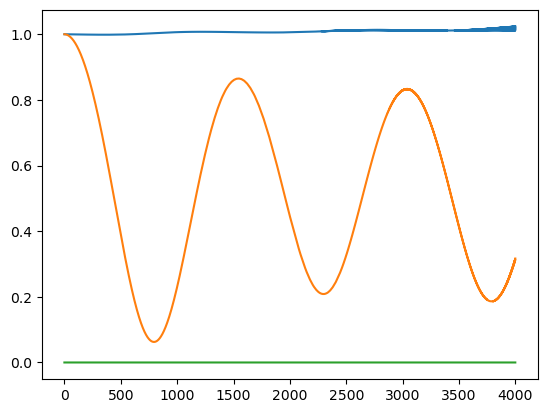

In [67]:
plt.plot(Ea)
plt.plot(Et)
plt.plot(Pa)

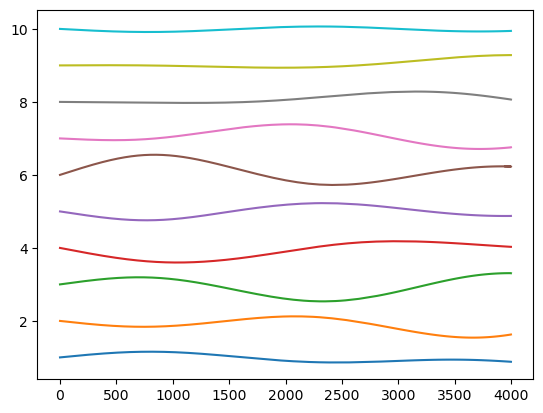

In [68]:
for i in range(10):
    plt.plot(poa[i,:])